# Paper MSSP 

## Population-Based SHM Under Environmental Variability Using a Classifier for Unsupervised Damage Detection
## Population-Based SHM Under Environmental Variability: Unsupervised Damage Detection with Explainable AI Neural Network Classifier

add explainable IA in the Title 

- author: Yacine Bel-Hadj
- Co-author : Wout Weijtjens, and Christof Devriendt


# Introduction 


## Context

### What is SHM?
<cite data-cite='brownjohn2007structural'>(shm_intro)</cite>
- Structural Health Monitoring (SHM) is :
    - here to ensure the safety, longevity, and efficient maintenance of structures.
    - a process that aims to **detect**, locate, and quantify damage in structures.
    - a process that aims understand the evolution of the structure over time.
    - a process that aims to **predict** the remaining useful life of the structure.

### Sensor used in SHM
There are many types of sensors used in SHM, and the trend is to use more with high sampling rate and spatial resolution.<br>
From the Strain gauges, accelerometers, Fiber Bragg Gratting and Image-based sensors, one can learn how the structure responds to external loads (unknown most of the time). The resulting data can be considered as a fingerprint of the structure. (possible elaboration on this point) 
(check this : Fibre-optic sensor and deep learning-based structural health monitoring systems for civil structures: A review)

### Focus sensor in this paper 
- The focus sensor in this paper is the accelerometer however, the strategy that is proposed in this paper can be applied to any type of sensor.
- Focus on the accelerometer because it is the most common sensor used in SHM.
- Usually the data from the accelerometer is used to extract features that are used in the damage detection process.
- Acceleromter data provide somewhat a hollistic view of the structure response, and they are non-invasive, cost-effective, and easy to install.
- The data from the accelerometer is usually processed to extract features that are used in the damage detection process.


### Challenges in Civil SHM
- In case of aircraft substructure, one can delibritaly damage the structure. however this is not possible in Civil structure ==> very hard to do delibrate damage on the structure.
- Civil structures: Deliberate damage is typically not feasible. Hence, the Finite Element (FE) models simulate damage scenarios. However, this makes us dependent on these models and limits the scenarios we can study.



### Motivation for Deep Learning in SHM

#### Engineered Features
- SHM today leans heavily on engineered features derived from the raw time series data.
- Classical example of features used in SHM in civil structures are : 
    - From accelerometer : Vibration level, band limited energy, modal parameters
    - From strain gauge : Fatigue rate, 
    - From acoustic emission : Energy, rise time, duration,acoustic velocity 
- These features correlate with design guidelines and engineering experience.
- While they are quantifiable and actionable, they're designed for specific anomalies. This could lead to missing out on unanticipated structural issues.



### Potential of Deep Learning
- Deep learning can learn features from the raw data, and is able to learn complex patterns, and is able to handle high dimensional data.
- Recent advancements in deep learning have shown promise in detecting features directly from raw data or with minimal feature engineering.
- Such an approach could offer a holistic interpretation of data without any biases.
- The desire for such holistic strategy is not new, already in 1988 variations in the signals from an offshore platform are used to infer damage.
- and also in other works (elaborate on this point)
- The current state of   to learn features from the raw data. (elaborate on this point)


### Scope and research question
- Holistic Damage Detection: We aim to develop a deep learning model that harnesses the raw data or requires minimal feature engineering to detect damage in civil structures, offering a holistic view of structural health.
- Environmental Variability: Our objective is to ensure the deep learning model effectively detects damages in civil structures even under various environmental conditions and influences.
- Model interpretability: One of the main challenges of deep learning is the lack of interpretability. we aim to develop a method that is able to broadcast what are the damage detectable and how can we quantify the model goodness in detecting damage. (How can training success be quantified without access to damage scenarios?  )
- The training and tuning of the model should use healthy data only and be unsupervised with respect to damage
- Differentiating between genuine damage and natural structural changes.
- Maintaining an output-only method, free from any load biases


# Methodology
## Conceptual Framework


### Model training and damage detection
- The proposed methodolody is based on an auxillary task of classification.
- In case of a population of similar structures, the model is trained to identify the structure from which the data is coming from.
- Therefore, the model learns descriminative features that makes each structure unique.
- It is assumed that those features are also the ones that are affected by damage.
- Once the model is trained, the ultimate layer,often called logits layer, is used to build a damage index. A simple damage index would be the softmax function applied to this layer. The rational behind using softmax is that this function give us the confidence of the model in it's classification (not completly true). As we believe that once the structure is damaged the model will not be able to classify it correctly.
- This approach is not limited only on the softmax function, other functions can be used to build the damage index. For example, the distance between the logits layer of the healthy data and the logits layer of the data to be classified can be used as a damage index by using for instance a gaussian mixture model.
- This approach is not limited to a population of different structure, one can also train the model at the auxiliary task to distinguish between different load cases, for example, looking at train passage on a railway bridge instrumanted with FGBs, we can ask the model to distinguish between the different train passage. Another use case is if we have a symetrical structure like an electrical pylon and four sensor are installed in each face of the pylon, we can ask the model to distinguish between the different faces of the pylon. the faces are supposed to be similar, however, the model will learn the difference between the faces.
- The proposed methodology is illustrated in the following figure. 
<div align="center">
    <img src="figures/conceptual_diagram.png" alt="Conceptual Diagram" width="50%" style="border: 1px solid black; padding: 10px; box-shadow: 5px 5px 8px #888888;"/>
</div>

softmax([19,1,1])  = 0.95,0.025,0.025<br>
not x , x is to vague v_i <br>
addd probability o/ logit layer
explain one hot encoding kroenecker delta
explain softmax  sum 1 ... reason of softmax 
graphs no need 
v in R 1xN
hyperparameter vs weights  clear distinction 

### Model training 
- the softmax with temperature function is applied to the logits layer to go from logits to probabilities.
$$
softmax(x) = \frac{e^{x / T}}{\sum_{j=1}^{M} e^{x_{j} / T}}
$$
Where:
- $ N $ : number of individuals
- $ x $ : logits layer
- $ x_{i} $ : logits of the $ i $-th individual
- $ T $ : temperature parameter (hyperparameter of the model)
The use of the softmax with temperature function is to have a more smooth probability distribution over the individuals, and reduce the overconfidence of the model in it's classification.


the loss function used is the cross entropy loss function defined as follows:
$$
\mathcal{L}=-\sum_{i=1}^{N} \sum_{j=1}^{M} y_{i j} \log \left(p_{i j}\right)
$$
where:
- $ N $ : number of samples in the batch (hyperparameter of the training)
- $ M $ : number of individuals
- $ y_{i j} $ : is the one hot encoding of the individual from which the data is coming from.
- $ p_{i j} $ : is the probability of the $ i $-th sample to be classified as the $ j $-th individual.
cross entropy is the most common loss function used in classification problems.
it. However, it is not the only loss function that can be used. For example, possible other option are arcface loss, and contrastive loss, and arccosine loss. But in this paper, we focus more on the methodology rather than tuning the model.


### Model interpretability and model testing
- Contrary to the feature engineering approach, Where the designed features used to build the damage index are understandable by the engineer, and one can before hand know what are the damage that are possibly detecable by the designed features. This is not the case with an approach based on a deep neural network, and this limitation is known as the black box problem.
- More recently, there is a growing interest in the explainable AI (XAI) field, where the goal is to make the AI more transparent and understandable by the human.
- In the case of anomaly detection, one would like to know what from the known damage that are known to the engineer, what are the damage that are detectable by the model and the severity of the damage to be detected.
- To this end, we propose an additional step in the workflow where the goal is to quantify the model goodness in detecting damage without access to damage scenarios. The idea is to manipulate the input signal and see what manipulation led to triggering our system.
- In the diagram below we illustrate the proposed methodology for model interpretability and model tuning.
- we take a testing data to which we perturbate in different manner and we observe the effect of the perturbation on the damage index.
for example in case of acceleration data we can add or attenunate a frequncy on the signal and see the effect on the damage index. and we can do this for different frequencies and different amplitudes. and see which are the affect frequency that led to a change in the damage index.
in order to compare the anomaly index of before and after manipulation we use the Area Under the Curve (AUC) of the ROC curve. 
this metrics is well suited for this task as it is independent of the threshold used to classify the data as healthy or damaged.
then we can visualize the AUC as a function of the frequency and amplitude of the perturbation. and we can see which are the frequency that led to a change in the damage index.
One can also average down all the AUCs for model tuning. 
<div align="center">
    <img src="figures/synthesis_anomaly.png" alt="Conceptual Diagram" width="100%" style="border: 1px solid black; padding: 10px; box-shadow: 5px 5px 8px #888888;"/>
</div>

## Implementation
### Study case I : a population of homogeneous 8-dof structures 20 individuals
- since the methodology is quite new, we start with a simple case where we have a population of 20 similar structures. to evaluate and better understand the proposed methodology.

#### Dataset and Simulation

- As the method that we propose is quite new, we need to test it on a simulated dataset.
- The simulated population is composed of 20 8-DOF systems subjected to excitation with white noise.
- The population is considered as a homogeneous population.


#### **8-DOF System**

<div align="center">
    <img src="figures/8dof_rpz.jpg" alt="8-DOF System" width="50%" style="border: 1px solid black; padding: 10px; box-shadow: 5px 5px 8px #888888;"/>
</div>

**System Variables:**
- $ u_j(t) $ : Input acceleration 
- $ z_j(t) $ : Output acceleration
- $ m_j $ : Mass of the \( j \)-th mass
- $ k_j $ : Stiffness of the \( j \)-th mass
- $ c_j $ : Damping of the \( j \)-th mass




**Environmental Effects:** <br>
Adding the effect of the environment by introducing a hidden latent variable that affects the stiffness, denoted by \( L \).
$$
c_j = c_j - \alpha_j \cdot L
$$
where:
- $ \alpha_j $ : Coefficient that models the environmental effect on the damping of the \( j \)-th mass.

**System Variable** <br>
The value of the system variables are given in the table below: <br>
this system is referred to as the *reference system*/*form*.


| $ j $ | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
| ------- | - | - | - | - | - | - | - | - |
| $ m_{j}(kg) $ | 0.5318 | 0.4040 | 0.4101 | 0.4123 | 0.3960 | 0.3809 | 0.4086 | 0.3798 |
| $ k_{j}(kN/m) $ | 1e-6 | 56.70 | 56.70 | 56.70 | 56.70 | 56.70 | 56.70 | 56.70 |
| $ c_{j}(Ns/m) $ | 8.7460 | 8.7916 | 8.8012 | 8.8512 | 8.7146 | 8.7378 | 8.5494 | 8.7521 |
| $ \alpha_{j}(kN/m) $ | 1e-9 | -20 | -20 | 350 | -30 | -350 | 100 | -45 |

**Population Creation**
- The system described above is used to create a population of 20 systems.
- Each individual of the population is created by adding noise to the *form* described above.

$$
\begin{aligned}
&m_{j}^{(i)} \sim \mathcal{N}\left(m_{j}, 0.03 \times m_{j}\right),  &k_{j}^{(i)} \sim \mathcal{N}\left(k_{j}, 0.01 \times k_{j}\right) \\
&c_{j}^{(i)} \sim \mathcal{N}\left(c_{j}, 0.08 \times c_{j}\right) , &\alpha_{j}^{(i)} \sim \mathcal{N}\left(\alpha_{j},  0.01\times \alpha_{j}\right)
\end{aligned}
$$
Where: 
- $ i $ : index of the individual
- $ j $ : index of the mass/DOF


#### effect of anomaly and latent variable on the system 
- The effect of the anomaly is to change one stiffness of the system.
- The effect of the latent variable is to change the stiffness of all the DOf of the system in different manner.
- The effect of the anomaly and the latent variable on the system is illustrated in the figure below.
<div align="center" style="display: flex; justify-content: center;">
    <img src="figures/envirement_effect.png" alt="effect_envirement" width="45%" style="border: 1px solid black; padding: 10px; box-shadow: 5px 5px 8px #888888; margin-right: 2%;">
    <img src="figures/anomaly_effect.png" alt="effect_anomaly" width="45%" style="border: 1px solid black; padding: 10px; box-shadow: 5px 5px 8px #888888;">
</div>



#### Simulations
- population of 20 individuals simulated with an excitation of white noise.
- affected by a latent variable an imitation of the environmental effect.
- simulation settings are dt =0.0025 and t_end = 20s.
- we simulate 2600 times each individual leading to a total of 52000 samples. 
- between each simulation we change the latent variable and amplitude of excitation vary , the latent variable is samples from a normal distribution of mean 60 and std of 20. the amplitude of excitation is sampled from a weibull distribution of shape \alpha 5 and \beta and \gamma 10 .
$$
weibul(x) = loc+\frac{shape}{scale} \left(\frac{x}{scale}\right)^{shape-1} e^{-\left(\frac{x}{scale}\right)^{shape}} 
$$


- 1200 samples are kept healthy and 1400 samples are damaged.
- in the case of the damaged samples, 7 different anomalies levels are considered (1% 3% 5% 7% 9% 11% 13%). 


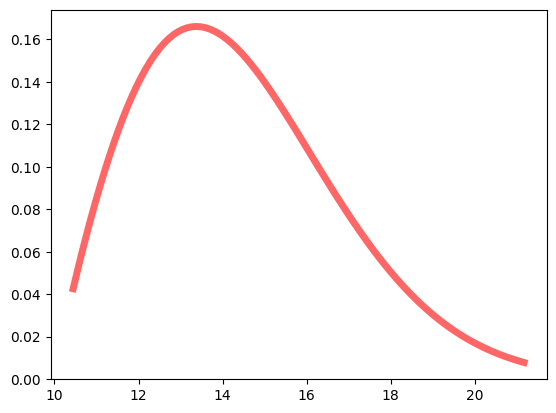

In [14]:
# plot the weibull distribution we use for the excitation
from scipy.stats import weibull_min
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
shape = 1.9
loc = 10 
scale = 5 
x = np.linspace(weibull_min.ppf(0.01, shape, loc=loc, scale=scale),
                weibull_min.ppf(0.99, shape, loc=loc, scale=scale), 100)
ax.plot(x, weibull_min.pdf(x, shape, loc=loc, scale=scale),
         'r-', lw=5, alpha=0.6, label='weibull_min pdf')

plt.show()


### Model training and damage detection
- preprocessing(least amount of preprocessing possible):
- filter the signals with a low pass filter of 150Hz.
- detrend the signals by removing the mean and dividing by the standard deviation so that the amplitude of signal is not a factor in the classification.
-  PSD computation using the welch algorithm with a window of 1024 samples per window = 2.56s and 50% overlap. the window chosen leads to a frequency resolution of 0.39Hz. 
- the use of PSD instead of time series is to reduce the dimensionality of the data and to have a more robust model but we believe that this does not affect the hollistic criterian we are looking for.
- in addition a CNN is able to learn the fourier transform of the signal and therefore the timeseries is not a problem if a bigger model is affordable.
- the log of the PSD is then min-max scaled to be between 0 and 1. and then the log of the PSD is used as input to the model.
- the model is trained to classify the individual from which the data is coming from. 
- the model logit layer is composed of 20 neurons, one for each individual. 
- The model is trained on a maximum of 100 epochs with a batch size of 32.
- the model is trained using the adam optimizer with a learning rate of 0.001. A scheduler is used to speed up the training process. where the learning rate is reduced by a factor of 0.1 if the validation loss does not improve for 10 epochs.
- Other scheduler can be used like the cosine annealing scheduler.
- The number of layers and the number of neurons per layer are hyperparameters that are tuned later using the model interpretability step and the average AUC method described above.





### training and evaluation strategy
first we split the data, 800 of the healthy of each individual are used for training total, 200 for validation and 200 for testing of each individual. leading to a total of 16000 samples for training, 4000 for validation and 4000 for testing. 



### Model interpretability and model tuning
- once the model is trained, we use the model interpretability step to see which are the model sensitivity to the input signal.
- the input signal is a log PSD of the acceleration signal. so the systhesised anomaly that are proposed are applying a notch filter on the input signal. the idea is to add or remove a component of the signal. the alteration is applied at different frequencies and different amplitudes.
- we took 200 testing samples from each individual and we apply the alteration on the input signal. we apply different cases of alteration, frequnecy going from 1 to 140 hz by step of 0.5 and amplitude of alteration varying between -0.35 and 0.35 with a step of 0.05. there in total 240*15=3600 different settings of alteration. this alteration are applying to each sample of the testing data leading to a total of 3600*200=720000 samples.  and for each individual we do the same thing leading to a total of 720000*20=14400000 samples to which our system is exposed to.
- to illustrate the alteration, we show in the figure below the effect of the alteration on the PSD  with 2 differents settings, one is a positive amplitude and the other is at negative amplitude.
<div align="center">
    <img src="figures/PSD_alteration.png" alt="8-DOF System" width="50%" style="border: 1px solid black; padding: 10px; box-shadow: 5px 5px 8px #888888;"/>
</div>
### smallter 



- Once we evaluated the model on the different possible settings of synthesised anomaly. we can plot the AUC as a function of the frequency and amplitude of the alteration for each system. each AUC is computed by comparing the anomaly index of the original signal and the anomaly index of the altered signal.
one can plot the this as a heatmap however, we propose to plot it as a contour plot as it gives a better visualisation of the AUC.
- the figure below shows the contour plot of the AUC as a function of the frequency and amplitude of the alteration for one of the system. 
- The black horizental line shows the resonance frequency of the system. 
- to interpret the figure, the closer the lines they get to y = 0 the better the algorithm is at detecting the anomaly.
- one can see that close to most of the resonance frequency the contour lines are close to y = 0. meaning that the model detect anomaly that has lower amplitude when the frequency is close to the resonance frequency. meaning that the model is sensible to alteration close to the resonance frequency. This is good news cause anomaly in real life exhibt them self in shift in modal frequncy.( the synthesised anomaly are not modal shift actually by they are close enough)

<div align="center">
    <img src="figures/contour.png" alt="8-DOF System" width="50%" style="border: 1px solid black; padding: 10px; box-shadow: 5px 5px 8px #888888;"/>
</div>



##### Hyperparameter tuning

- once our model is evaluated on the different settings of synthesised anomaly, we can tune the hyperparameters of the model using the average of all AUCs. however, instead of using a simple average, we weight the inverse of the amplitude of anomaly that the AUCs was computing on, meaning that the higher aucs with lower amplitude of anomaly will have more weight in the average.
once we average down all the AUCs we can tune our model hyperparameters. 
- the hyperparameters that we tune are the number of layers and the number of neurons per layer (add all here not yet finished correctly)
- then we can plot a control chart representing the anomaly index evolution over the time were we introduice structural damage to the system. structural is stiffness reduction
<div align="center">
    <img src="figures/control_chart.png" alt="8-DOF System" width="50%" style="border: 1px solid black; padding: 10px; box-shadow: 5px 5px 8px #888888;"/>
</div>
- One can see that we have a clear shift in the anomaly index when the stiffness is reduced by 3% percent. 
- we later compare this to a method based on resance frequnecy it self of the system.
- to further emphasis that it make sense to hyperparamter tune using the synthesised anomaly we tracked during the tuning process the average aucs of the average synthesised anomaly and the aucs computed between the testings healthy data and the testing data with 3% stiffness reduction.

- the figure below shows the evolution of the average aucs of the average synthesised anomaly and of the structural damage of 3%.
<div align="center">
    <img src="figures/sa_vs_real_auc.png" alt="8-DOF System" width="50%" style="border: 1px solid black; padding: 10px; box-shadow: 5px 5px 8px #888888;"/>
</div>
- it is clear that there is a strong relation between these two metrics. one can be seen as real damage and the as synthesised damage that we can always produce without really damaging the structure.

#### Baseline method
- we compare our method to a baseline method based on the resonance frequency of the system.
- the baseline method is based on the fact that the resonance frequency of the system is affected by the stiffness of the system.
- we do not intend to outperform the baseline method, the goal is if detecing damage at 3% stiffness reduction is good enough. 
- This method uses the exact resonance frequency of the system to which we add error with a normal distribution of mean 0 and std of 0.3Hz. The 0.3Hz is chosen as it is close to the frequency resolution of the PSD. and this error leads to 1.5% in the resoance frequncy of the lowest resonance frequency of the system. as feature engineered using OMA also contain error and are never exact.
- the figure below shows resonance frequency of the system 0 evolution and how it is affected by the structural damage
<div align="center">
    <img src="figures/res_freq.png" alt="8-DOF System" width="100%" style="border: 1px solid black; padding: 10px; box-shadow: 5px 5px 8px #888888;"/>   
</div>


- As our simulation includes environmental effects, it is essential to eliminate these effects to prevent masking the resonance frequency variations caused by anomalies. We employ a PCA-based approach to identify a linear subspace where environmental effects are located and compute the residual of the projection onto this subspace to remove the environmental effects\cite{deraemaeker2008vibration}. The Scree plot criterion \cite{cattell1966scree}, also known as the 'elbow rule', is utilized to determine the number of principal components to consider. The intention is not to compete with the baseline method, as one is feature-based and the other considers the entire spectrum. These two methods perform better when complementing each other. The objective here is to have a better quantification of the performance of the proposed approach w.r.t. a commonly accepted strategy for SHM. Notice that the PCA here is the perfect solution as the latent variable is linear affectign the res freq (polynomial relation ship between res and latent var) .


(add the figure of the baseline method and the comparison between the two methods)
add comparison between the two methods in tables and in term of AUC

## Study case II : Electrical Pylon
- The second study case is a real life case of an electrical pylon.
- The pylon is instrumented with 4 tri-axis accelerometers, one on each face of the pylon.
- The tower was instrumented with four triaxial MEMS accelerometers (MicromegaIAC-UHRS-Ud-03, ±3g) on each face of the symmetric bolted steel lattice tower, as depicted in fig bellow

- The pylon is subjected to wind excitation.
- The faces of the pylon are supposed to be similar. However, the model will learn the difference between the faces and the direction (X,Y,Z) of the accelerometer.
- Schematic of SHM setup on electrical transmission
tower with the location of the controlled damage simulation and
sensor placement
- a constraint of the project was set by the TSO was that all sensors were installed below the anti-climb barrier indicated with a red bar on the bottom left of . This was motivated from a maintenance perspective, if sensors could be installed close to the ground, the overall cost of widespread instrumentation could be minimized and maintenance facilitated.
Unique to the current experiment was the execution of controlled damage scenarios that were defined by the TSO to simulate (exaggerated) damages that were found at other locations. The scheduled heavy maintenance planned for the tower at the end of the experiment provided the opportunity to perform simulated damages on the structure. However, the structural integrity of the transmission tower was not compromised at any time. 
<div align="center">
    <img src="figures/schema_enhanced.png" alt="8-DOF System" width="60%" style="border: 1px solid black; padding: 10px; box-shadow: 5px 5px 8px #888888;"/>   
</div>
- Data were continuously collected at a sampling rate of 250\si{\hertz} from March 29 to June 25, 2022. However, a reliability issue occurred with the accelerometer installed on face 1 in the Z direction, so this sensor was treated with extra care.



### Model Training and Damage Detection
- preprocessing(least amount of preprocessing possible):
    - filter the signals with a low pass filter of 50Hz.
    - detrend the signals by removing the mean and dividing by the standard deviation so that the amplitude of signal is not a factor in the classification.
    -  PSD computation using the welch algorithm with a window of 1024 samples per window = 4.096s and 50% overlap. the window chosen leads to a frequency resolution of 0.24Hz.
    - the log of the PSD is then min-max scaled to be between 0 and 1. and then the log of the PSD is used as input to the model.
- the model logit layer is composed of 4+3 neurons, the first 4 neurons are for the 4 faces of the pylon and the last 3 neurons are for the 3 directions of the accelerometer.
so the model is having 2 tasks, the first task is to classify the face of the pylon and the second task is to classify the direction of the accelerometer.
- It wouldn't make sense to have 12 neurons one for each face and direction as the different between 2 direction and 2 faces is not similar 


%%bash
ipython nbconvert --to latex --template citation.tplx Paper_plots
pdflatex Paper_plots.tex
bibtex Paper_plots
pdflatex Paper_plots.tex